 # 🎲 ANÁLISE E LIMPEZA DE DADOS - GAMES 🎲
 
 Por Evelyn Rosa

<h3> Agenda: </h3>

1. Informações gerais sobre o DataFrame;
2. Importando as bibliotecas eo DataFrame;
3. Checando as informações do DataFrame;
4. Visualizando os dados;
5. Limpando os dados;
6. Analisando os dados;
7. Conclusão.

 <H3> 1. Informações Gerais Sobre o DataFrame </H3>

O Dataframe possui informações sobre os jogos avaliados na plataforma de games Metacritic. Os detalhes sobre cada coluna são:

1. name - nome do jogo;
2. platform - plataforma do jogo;
3. developer - desenvolvedora do jogo;
4. publisher - publicadora do jogo;
5. genre(s) - gênero do jogo;
6. players - número de jogadores;
7. rating - avaliação ESRB;
8. attribute - informação adicional do jogo;
9. release_date - data de lançamento do jogo;
10. link - url da página do jogo;
11. critic_positive - número de reviews positivas da crítica;
12. critic_neutral - número de reviews neutras da crítica;
13. critic_negative - número de reviews negativas da crítica;
14. metascore - média do score da crítica;
15. user_positive - número de reviews positivas dos usuários
16. user_neutral - número de reviews neutras dos usuários;
17. user_negative - número de reviews negativas dos usuários;
18. user_score - média do score dos usuários.


<h3>2. Importando as Bibliotecas eo DataFrame</h3>

O primeiro passo em um projeto de Limpeza e Análise de dados é importar as bibliotecas que utilizaremos durante o trabalho.

In [166]:
# Bibliotecas
import pandas as pd # para visualizar e printar os dados
import matplotlib.pyplot as plt # para construir e customizar gráficos
import seaborn as sns  # para visualizar gráficos
import numpy as np # para operações matemáticas

%matplotlib inline 

Em seguida, é necessário importar o dataset de onde as informações serão extraídas para limpeza e analize.

In [167]:
# DataFrame
df = pd.read_csv("games.csv")

<h3>3. Checando as informações do DataFrame</h3>
Analisando as Features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20422 entries, 0 to 20421
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20422 non-null  object 
 1   platform         20422 non-null  object 
 2   developer        20363 non-null  object 
 3   publisher        20392 non-null  object 
 4   genre(s)         20422 non-null  object 
 5   players          13193 non-null  object 
 6   rating           18138 non-null  object 
 7   attribute        324 non-null    object 
 8   release_date     20422 non-null  object 
 9   link             20422 non-null  object 
 10  critic_positive  20422 non-null  int64  
 11  critic_neutral   20422 non-null  int64  
 12  critic_negative  19084 non-null  float64
 13  metascore        20422 non-null  int64  
 14  user_positive    20422 non-null  int64  
 15  user_neutral     20409 non-null  float64
 16  user_negative    20422 non-null  int64  
 17  user_score  

- O DataFrame possui 20422 linhas e 18 colunas.

- Há 20422 entradas mas nem todas as colunas apresentam esse valor, o que significa que existem dados faltantes (quantidade de dados nulos).

- Existem 11 colunas com dados categóricos (object) e 7 com dados numéricos (int e float).

Como foi observado, existem dados que não estão de acordo com o dataset. Na coluna Plataform e na coluna Genre(s) é possível notar os respectivos dados " quando vai ser o churrasturing?" e "agora eu sou solteira e ninguém vai me segurar" que não se encaixam nas informações da coluna. 
Para que possamos fazer uma boa análise de dados é preciso antes verificar a consistência das informações e remover o que é dispensável. A melhor forma de fazer isso é visualizando e limpando os dados.

   <h3>4. Visualizando os dados </h3>

Para enxergar melhor as informações de cada coluna e assim perceber inconsistencias, basta importar as primeiras linhas para que assim seja possível ter um panorama inicial dos dados:


In [4]:
df.head()

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
0,Command & Conquer,quando vai ser o churrasturing?,NaN,NaN,AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR...,1-4,aceitas pix,NaN,"Aug 31, 1995",/game/pc/command-conquer,5,0,NaN,94,47,NaN,1,8.9
1,Full Throttle,PC,LucasArts,LucasArts,Adventure,NaN,NaN,NaN,"Apr 30, 1995",/game/pc/full-throttle,6,2,0.0,86,18,1.0,0,8.7
2,Battle Arena Toshinden,PS,Tamsoft,SCEA,Action,1-2,T,NaN,"Sep 9, 1995",/game/playstation/battle-arena-toshinden,1,3,0.0,69,1,0.0,1,5.8
3,Sid Meier's Civilization II,PC,MPS Labs,MicroProse,Strategy,1 Player,K-A,NaN,"Feb 29, 1996",/game/pc/sid-meiers-civilization-ii,7,0,0.0,94,46,0.0,1,8.9
4,Quake,PC,id Software,id Software,Action,1-16,M,NaN,"Jun 22, 1996",/game/pc/quake,9,0,0.0,94,84,4.0,1,8.8


Outra boa alternativa para a viasualização de erros é mudar a ordem do dataframe elencando as informações de acordo com a sua popularidade, essa opção ajuda a ver mais rapidamente dados destoantes.

Usaremos a coluna Genre(s) afim de ordenar as entradas do maior até o menor. Ou seja, do gênero mais popular até o menos popular.

In [5]:
# Mostra na tela os gêneros em ordem decrescente
df.sort_values('genre(s)', ascending=False, inplace=False).head(15) 

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
15665,Arcania: The Complete Tale,PS4,Nordic Games Publishing,Nordic Games Publishing,Western-Style,NaN,T,NaN,"May 12, 2015",/game/playstation-4/arcania-the-complete-tale,0,2,NaN,42,2,4.0,4,4.8
10514,Combat Mission: Battle for Normandy,PC,Battlefront.com,Battlefront.com,Wargame,NaN,NaN,NaN,"May 17, 2011",/game/pc/combat-mission-battle-for-normandy,3,1,0.0,81,16,4.0,7,5.4
12316,Damage Inc.: Pacific Squadron WWII,X360,Mad Catz,Mad Catz,WWII,NaN,T,NaN,"Aug 28, 2012",/game/xbox-360/damage-inc-pacific-squadron-wwii,1,12,11.0,49,0,0.0,1,5.5
13837,IL-2 Sturmovik: Battle of Stalingrad,PC,1C Game Studios,Excalibur Publishing Limited,WWI,NaN,T,NaN,"Aug 14, 2014",/game/pc/il-2-sturmovik-battle-of-stalingrad,3,4,0.0,74,85,23.0,63,6.0
13992,The Sims 4,PC,Maxis,Electronic Arts,Virtual Life,No Online Multiplayer,T,NaN,"Sep 2, 2014",/game/pc/the-sims-4,31,41,2.0,70,189,146.0,496,4.1
13949,Tropico 5,X360,"Haemimont, Haemimont Games",Kalypso,Tycoon,NaN,T,NaN,"Nov 11, 2014",/game/xbox-360/tropico-5,1,3,0.0,71,0,2.0,1,7.4
13000,Zoo Tycoon,XONE,Frontier Developments,Microsoft Game Studios,Tycoon,Up to 4,E,NaN,"Nov 22, 2013",/game/xbox-one/zoo-tycoon,12,32,NaN,68,7,9.0,10,3.1
13787,Tropico 5,PC,"Haemimont, Haemimont Games",Kalypso,Tycoon,NaN,T,NaN,"May 23, 2014",/game/pc/tropico-5,31,19,1.0,75,28,23.0,26,7.0
17122,RollerCoaster Tycoon World,PC,Nvizzio Creations,Atari,Tycoon,No Online Multiplayer,E,NaN,"Nov 16, 2016",/game/pc/rollercoaster-tycoon-world,0,2,5.0,43,4,1.0,20,2.1
14832,Tropico 5,PS4,"Haemimont, Haemimont Games",Kalypso,Tycoon,Up to 4,T,NaN,"Apr 28, 2015",/game/playstation-4/tropico-5,12,5,0.0,76,11,7.0,6,7.1


Agora que ordenamos a visualização do dataframe pelos gêneros mais populares, aplicaremos as modificações no dataset original:

In [168]:
# Altera o dataFrame original
df.sort_values('genre(s)', ascending=True, inplace=True)

Com essa organização das informações é possível notar que algumas coisas saltam aos olhos. Podemos observar que existe uma diferenciação entre os valores 'Wargame', 'WWI' e 'WWII'. Entretanto, 'WWI' e 'WWII' pertencem a mesma categoria de 'Wargame'.

<h3> 5.  Limpando os Dados </h3>

<h4> 5.1 Duplicadas </h4>

Um passo importante durante a limpeza de um DataFrame é a remoção de linhas duplicadas

In [7]:
df[df.duplicated()]

,name,platform,developer,publisher,genre(s),players,rating,attribute,release_date,link,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative,user_score
8258,Bookworm,DS,PopCap,PopCap,Miscellaneous,NaN,E,NaN,"Nov 30, 2009",/game/ds/bookworm,2,4,0.0,80,0,0.0,0,tbd
8260,Bookworm,DS,PopCap,PopCap,Miscellaneous,NaN,E,NaN,"Nov 30, 2009",/game/ds/bookworm,2,4,0.0,71,0,0.0,0,tbd


Após ter certeza sobre quais linhas estão duplicadas, é possível removê-las: 

In [169]:
df.drop_duplicates(inplace = True)

<h4>5.2  Removendo Colunas Desnecessárias </h4>

Existem algumas colunas em nosso dataFrame que possuem informações que não serão tão úteis durante a análise. É o caso da coluna 'link', que contém links para as páginas dos jogos, e da coluna 'attribute', que contém informações adicionais.
A maneira heterogênea como são apresentados e a grande quantidade de dados dados faltantes, sobretudo na coluna 'attribute', impede que façamos agrupamentos e possam ser feitas comparações com as demais colunas.

In [170]:
# Removendo as colunas "link" e "attribute"
df.drop(columns=['link', 'attribute'], inplace=True)

<h4> 5.3 Limpando as Features </h4>

- Limpeza de Dados Categóricos

In [10]:
# limpando a coluna genre(s)

Já que observamos erros anteriormente na coluna Genre(s), iniciaremos a limpeza das colunas por ela. Vamos renomear a coluna para 'genre' afim de evitar possíveis erros na hora de ultilizarmos algumas funções.

In [171]:
# Renomeando a coluna genre(s)
df.rename(columns={'genre(s)': 'genre'}, inplace = True)

Agora veremos os valores unicos existentes na coluna. Isso é particularmente útil para verificar os diferentes valores em um campo categórico.

In [11]:
# verificando os valores da coluna genre
df['genre'].unique()

array(['2D', '3D', '4X',
       'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO',
       'Action', 'Action Adventure', 'Action RPG', 'Adventure',
       'Alternative', 'Arcade', "Beat-'Em-Up", 'Board Games',
       'Breeding/Constructing', 'Card Battle', 'City Building',
       'Compilation', 'Console-style RPG', 'Dancing', 'Driving',
       'Edutainment', 'Fantasy', 'Fighting', 'First-Person', 'Flight',
       'Formula One', 'Futuristic', 'GT / Street', 'General', 'Historic',
       'Horror', 'Ice Hockey', 'Japanese-Style', 'MOBA',
       'Massively Multiplayer Online', 'Military', 'Miscellaneous',
       'Modern', 'Music', 'Music Maker', 'Olympic Sports', 'Other',
       'PC-style RPG', 'Party', 'Pinball', 'Platformer', 'Puzzle',
       'Racing', 'Rail', 'Rally / Offroad', 'Real-Time', 'Role-Playing',
       'Sci-Fi', 'Scrolling', 'Shooter', 'Sim', 'Simulation', 'Sports',
       'Strategy', 'Street', 'Tactical', 'Third-Person', 'Traditional',
       'Turn-Based', 'T

 faremos então a substituição dos valores 'WWI' e 'WWII' por 'Wargame':

In [172]:
#Substituir WWI por Wargame:
df["genre"].replace("WWI", "Wargame", inplace = True)

#Substitui WWII por Wargame:
df["genre"].replace("WWII", "Wargame", inplace = True)

Há também na coluna, informações como 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO' e 'Sim' que precisam ser tratadas, seguiremos os seguintes passos:
-   contar as ocorrências de 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO' na coluna gênero
-  verificar qual a melhor maneira de tratar a informação 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO'
- Substituir 'Sim' por 'Simulator' para corigir a diferenciação entre os valores e uniformiza-los

In [99]:
# contando as ocorrências de "AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO" na coluna genre
freq_solteira = df["genre"].str.contains('AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO').value_counts()
print(freq_solteira)

False    20415
True         5
Name: genre, dtype: int64


Como existe pouca ocorrência (apenas 5) de 'AGORA EU SOU SOULTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO' optamos por excluir as linhas, de modo que não impactará em nossa análise.

In [173]:
# Excluindo as linhas em que "AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO" aparece na coluna genre
genre_solteira = df[df['genre'] == 'AGORA EU SOU SOLTEIRA E NINGUEM VAI ME SEGURAR, DAQUELE JEEEEITO'].index
df.drop(genre_solteira, inplace=True)

In [174]:
# Substituindo 'Sim' por 'Simulation'
df["genre"].replace("Sim", "Simulation", inplace = True)

In [22]:
# Limpando a Coluna Name

In [16]:
print("name column unique values:")
print(pd.Series(df.name.unique()), end = "\n\n")

name column unique values:
0        Dragon Quest Heroes: The World Tree's Woe and ...
1                                       Super Lucky's Tale
2                                              Rad Rodgers
3                                                 Deadpool
4                      Sengoku Jidai: Shadow of the Shogun
                               ...                        
13239                                        Atlas Reactor
13240                                            Tropico 5
13241                           RollerCoaster Tycoon World
13242                 IL-2 Sturmovik: Battle of Stalingrad
13243                  Combat Mission: Battle for Normandy
Length: 13244, dtype: object



As informações da coluna 'name' são consistentes, não precisamos fazer alterações.

In [50]:
# Limpando a Coluna Platform

In [17]:
# Verificando a ocorrência dos valores na coluna platform
df["platform"].value_counts()

PC                                 4372
X360                               1826
PS4                                1818
PS2                                1528
PS3                                1476
XONE                               1310
pc                                 1060
DS                                  986
WII                                 872
Switch                              812
XBOX                                664
PSP                                 607
GBA                                 597
3DS                                 539
GC                                  512
VITA                                408
WIIU                                319
PS                                  256
xBoX                                173
DC                                  143
N64                                  89
quando vai ser o churrasturing?      48
Name: platform, dtype: int64

 Há 48 linhas em que'quando vai ser o churrasturing' aparece no dataFrame. Como não se encaixam na coluna, e são poucas as ocorrências, decidimos substitui-las pela moda.
Além disso, há outras informações que precisam ser reparadas, é possível notar que há uma diferenciação entre os valores 'xBOX' e 'XBOX' e também 'pc'e 'PC' que rementem à mesma informação.

Substituiremos para uniformizar os dados:

In [175]:
# Substituindo 'quando vai ser o churrasturing' pela moda
df['platform'].replace('quando vai ser o churrasturing?', df['platform'].mode()[0], inplace=True)

# Substituindo 'xBOX' por 'XBOX'
df["platform"].replace("xBOX", "XBOX", inplace = True)

# Substituindo 'pc' por 'PC'
df["platform"].replace("pc", "PC", inplace = True)

In [24]:
# Limpando a Coluna Developer

In [19]:
# Verificando os valores existentes na coluna developer
print("developer column unique values:")
print(pd.Series(df.developer.unique()), end = "\n\n")

developer column unique values:
0                Omega Force
1              Playful Corp.
2       Slipgate Studios LLC
3          High Moon Studios
4            Byzantine Games
                ...         
4737      FIX Korea, Co. LTD
4738    Boss Key Productions
4739         SCEI, Clap Hanz
4740         1C Game Studios
4741         Battlefront.com
Length: 4742, dtype: object



Não verificamos nenhuma informação incorreta na coluna 'developer'. Entretanto, há dados faltantes que corrigiremos posteriormente.

In [26]:
# Limpando a Coluna Publisher

In [20]:
# Verificando os valores existentes na coluna publisher
print(" column publisher unique values:")
print(pd.Series(df.publisher.unique()), end = "\n\n")

 column publisher unique values:
0                    Square Enix
1         Microsoft Game Studios
2                  Playful Corp.
3                     THQ Nordic
4                     Activision
                  ...           
2226    Neptune Interactive Inc.
2227              Skyshine Games
2228          Nine Tales Digital
2229              Ludeon Studios
2230                    OGPlanet
Length: 2231, dtype: object



No caso da coluna 'publisher' também há dezenas de dados faltantes que substituiremos posteriormente. Não há nenhuma informação inconsistente. 

In [28]:
# Limpando a Coluna Players

In [12]:
# Verificando os valores existentes na coluna players
df["players"].value_counts()

No Online Multiplayer    3884
1 Player                 2590
1-2                      1488
1-4                      1169
2  Online                 420
Up to 4                   388
4  Online                 364
Online Multiplayer        331
1-8                       330
2                         303
8  Online                 262
Up to 8                   235
Massively Multiplayer     146
16  Online                136
Up to 6                   108
1-16                       99
Up to 16                   89
Up to 12                   89
6  Online                  86
1-6                        73
Up to 10                   65
1-32                       50
32  Online                 47
10  Online                 42
12  Online                 41
1-3                        33
24  Online                 32
Up to 18                   28
Up to 22                   24
1-5                        23
1-12                       18
Up to 64                   18
Up to 24                   18
Up to 3   

Verificamos que há alguns problemas na padronização dos dados da coluna "Player", os quais apresentam informações semelhantes, ora em números, ora em caracteres alfanuméricos. Portanto, iremos padronizar os dados dessa coluna, além de remover os espaços em branco adicionais.

In [176]:
# Padrozinando as informações da coluna players
df["players"] = df["players"].str.strip()
df["players"].replace({"1-4":"Up to 4", "1-2":"Up to 2", "1-16":"Up to 16", "1-6":"Up to 6", "1-8": "Up to 8", "1-5": "Up to 5", "1-32":"Up to 32", "1-10":"Up to 10","1-3":"Up to 3", "1-12": "Up to 12", "1-64":"Up to 64", "1-24": "Up to 24"}, inplace=True)

In [30]:
# Limpando a Coluna Rating

In [23]:
# Verificando os valores existentes na coluna rating
print("rating column unique values:")
print(pd.Series(df.rating.unique()), end = "\n\n")

rating column unique values:
0              T
1              E
2              M
3            NaN
4           E10+
5    aceitas pix
6             RP
7             AO
8            K-A
9             EC
dtype: object



É possível notar o valor 'aceitas pix' que não se encaixa na coluna rating. Vamos verificar sua ocorrência:

In [104]:
freq_pix = df['rating'].str.contains('aceitas pix').value_counts()
print(freq_pix)

False    18094
True        37
Name: rating, dtype: int64


Como existe pouca ocorrência (apenas 37) de 'aceitas pix' optamos por excluir as linhas, de modo que não impactará em nossa análise.

In [177]:
# Excluindo as linhas em que "aceitas pix" aparece na coluna rating
rating_pix = df[df['rating'] == 'aceitas pix'].index
df.drop(rating_pix, inplace=True)

In [32]:
# Limpando a Coluna Release_date

In [178]:
print("release_date column unique values:")
print(pd.Series(df.release_date.unique()), end = "\n\n")

release_date column unique values:
0       Oct 13, 2015
1       Nov  7, 2017
2       Feb 21, 2018
3       Jun 25, 2013
4       Jun 24, 2013
            ...     
4311    Nov 15, 2015
4312    Dec 10, 2010
4313    Jul 14, 2005
4314    Apr  7, 2006
4315    Jul 16, 2002
Length: 4316, dtype: object



Pensando em uma análise de dados ao longo dos anos, decidiamos manter apenas as informações referentes ao ano de lançamento dos jogos.

In [179]:
# transformaando os dados da coluna 'release_date' em objetos do tipo datetime
df['release_date'] =  pd.to_datetime(df['release_date'], infer_datetime_format=True)
df['release_date']

14798   2015-10-13
18391   2017-11-07
18509   2017-11-07
19901   2018-02-21
13179   2013-06-25
           ...    
13992   2014-09-02
13837   2014-08-14
12316   2012-08-28
10514   2011-05-17
15665   2015-05-12
Name: release_date, Length: 20378, dtype: datetime64[ns]

In [180]:
# convertendo a data completa em ano
df['release_date'] = pd.DatetimeIndex(df['release_date']).year
df['release_date']

14798    2015
18391    2017
18509    2017
19901    2018
13179    2013
         ... 
13992    2014
13837    2014
12316    2012
10514    2011
15665    2015
Name: release_date, Length: 20378, dtype: int64

- Limpeza de Dados Numéricos

In [29]:
df.describe()

,release_date,critic_positive,critic_neutral,critic_negative,metascore,user_positive,user_neutral,user_negative
count,20378.000000,20378.000000,20378.000000,19046.000000,20378.000000,20378.000000,20366.000000,20378.000000
mean,2010.183777,10.791442,7.238542,1.527302,68.815389,16.838846,4.601885,6.391844
std,5.451382,14.977832,7.241227,3.182118,13.249979,71.857536,16.337891,51.931734
min,1995.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000
25%,2006.000000,1.000000,2.000000,0.000000,61.000000,1.000000,0.000000,0.000000
50%,2010.000000,5.000000,5.000000,0.000000,71.000000,3.000000,1.000000,1.000000
75%,2015.000000,14.000000,10.000000,2.000000,78.000000,10.000000,3.000000,3.000000
max,2018.000000,118.000000,60.000000,51.000000,99.000000,3029.000000,507.000000,3001.000000


Podemos observar que por ter sido registrado como 'objective' a coluna 'user_score' não aparece na função `describe()`. Posteriormente iremos ajustar seu datatype.

In [34]:
# Limpando a Coluna Critic_positive

In [30]:
# Verificando os valores da coluna critic_positive
df['critic_positive'].unique()

array([ 59,   8,   1,   4,   5,  10,   0,   3,  35,  50,  75,  18,  14,
        66,  53,  49,  52,  54,  28,  51,  67,  73,  25,  60,  79,  22,
        38,  27,  41,  16,  39,  63,  56,   6,  13,  43,  17,  31,   9,
        37,  21,  33,  26,  65,  82,   2,  81,  84,  94,  48,  12,  29,
        15,  23,  24,  11,  32,  20,  34,  36,   7,  46,  19,  30,  40,
        42,  45,  47,  57,  70,  62,  55,  64,  58,  72,  83,  68,  92,
        77,  74,  85,  80,  90,  69,  76,  61,  88,  44,  96,  93,  71,
       100,  78, 113,  89,  98,  87, 101,  86, 110,  97, 118, 106, 105,
        99, 111], dtype=int64)

Não há nenhum valor inconsistente.

In [35]:
# Limpando a  Coluna Critic_neutral

In [31]:
# Verificando os valores da coluna critic_neutral
df['critic_neutral'].unique()

array([14, 41,  4,  3, 21, 37, 15,  1,  8,  2,  6, 10, 12,  0, 16,  9, 11,
        5, 30, 13, 17,  7, 18, 20, 25, 19, 29, 40, 22, 27, 26, 23, 39, 24,
       47, 42, 38, 32, 31, 28, 45, 34, 49, 58, 35, 36, 44, 43, 33, 48, 53,
       54, 51, 50, 46, 60, 55], dtype=int64)

Não há nenhum valor inconsistente.

In [36]:
# Limpando a Coluna Critic_negative

In [32]:
# Verificando os valores da coluna critic_negative
df['critic_negative'].unique()

array([nan,  2.,  0.,  1.,  3., 12., 19., 11.,  4.,  6., 18., 14., 21.,
       20.,  5., 26., 13., 38.,  9., 15.,  8., 33., 31., 23., 25., 24.,
        7., 10., 32., 34., 27., 17., 22., 16., 30., 43., 28., 36., 51.,
       39.])

Não há nenhuma informação destoante, entranto, posteriormente vamos mudar o datatype da coluna de float para int.

In [37]:
# Limpando a Coluna Metascore

In [33]:
# Verificando os valores da coluna metascore
df['metascore'].unique()

array([77, 64, 59, 67, 61, 62, 63, 85, 66, 84, 65, 86, 89, 88, 87, 83, 81,
       80, 90, 82, 49, 48, 47, 46, 45, 50, 54, 53, 52, 51, 44, 43, 36, 34,
       33, 32, 28, 95, 92, 91, 37, 38, 41, 39, 79, 71, 70, 72, 74, 73, 68,
       69, 78, 76, 75, 55, 60, 58, 57, 56, 94, 93, 22, 26, 27, 40, 35, 42,
       31, 30, 29, 20, 19, 23, 21, 97, 96, 24, 25, 18, 15, 17, 98, 11, 99,
       14,  8, 16, 13, 12], dtype=int64)

 Considerando que a coluna diz respeito a média do score da crítica, ela deve ter valores ser composta de números de 0 a 100. Vamos então checar se existe algum número distoante com as funções max e min:

In [181]:
# Checando valores com as funções max e min
df['metascore'].max() <= 100 and df['metascore'].min() >= 0

True

Tudo certo com os valores da coluna metascore.

In [38]:
# Limpando a Coluna User_positive

In [35]:
# Verificando os valores da coluna user_positive
df['user_positive'].unique()

array([  21,   34,   10,    1,   20,   49,   78,    0,  465,   76,   27,
          5,    6,  102,  594,    9,   18,   29,  202,    4,  120,  195,
         83,   43,   23,   22,   14,  125, 1069,  104,  158, 1306,  196,
          8,  708,  130,   50,  305,    3,  205,  111,   12,   93,  103,
         19,   56,   24,    2,   55,    7,  505,  116,   28,   15,   13,
         17,  134,  527,  162,   16,  259, 1713,  208,  132,  338,   42,
         46,   33,   38,  135,   59,  167,   11,   84,   69,   82,  128,
         98,  114,   35,  209,  351,   45,   80,  174,   62,   67,   36,
         47,  143,   26,   30,   58,   51,   90,  141,  186,   54,  126,
        281,   86,  256,  124,   52,  105,  223,   57,   73,   53,  101,
         39,   71,   25,   81,   61,   66,   37,   40,  133,   31,  171,
        193,  304, 1117,  333,   44,  293,   85,  344,  122,   68,  368,
         41,   32,   64,   48,  222,  189,  138,  178,   92,  224,   99,
        146,  173,  217,  323,  151,  243,  176,  1

Tudo certo com a coluna, não há inconsistências. 

In [39]:
# Limpando a Coluna User_neutral

In [36]:
# Verificando os valores da coluna user_neutral
df['user_neutral'].unique()

array([  6.,  11.,   2.,  20.,  32.,  35.,   1.,   0.,  67.,  25.,  24.,
        43., 111.,   3.,   8.,  45.,  34.,  14.,   9.,  16., 192.,  33.,
       464.,  65., 260.,   4.,  53., 120.,  13.,  19.,  71.,  17.,  44.,
        10.,   7.,  26., 112.,  41., 108.,  12.,   5.,  21.,  62.,  36.,
        29.,  60.,  66.,  61., 149., 170.,  50.,  30.,  18.,  15., 113.,
        40.,  52., 132.,  75., 101.,  28.,  22.,  23.,  39.,  85.,  55.,
        48.,  99.,  46.,  58., 303.,  64.,  38., 173.,  37.,  42.,  90.,
        27.,  59., 110.,  89., 118.,  nan, 126., 204., 139.,  51.,  70.,
        54., 135., 215.,  77.,  31.,  81.,  76., 164.,  95.,  78.,  98.,
       212.,  63., 129.,  96.,  82., 127.,  56.,  84.,  47.,  86., 134.,
        83.,  80.,  72.,  49., 148., 103.,  79., 140.,  68., 123.,  87.,
        91., 130.,  69.,  88., 105., 124.,  73., 154.,  97., 142., 178.,
       328., 128.,  57., 271., 207., 236.,  93.,  94., 225.,  74., 122.,
       223., 152., 442., 238., 137.,  92., 153., 17

Existem dados faltantes na coluna que substituiremos posteriormente.

In [40]:
# Limpando a Coluna User_negative

In [37]:
#Verificando os valores únicos da coluna user_negative
df['user_negative'].unique()

array([  11,    6,    1,    0,    7,    9,   10,   81,   19,   17,  117,
          3,    5,   24,    4,    2,   20,  270,   14, 2546,   25, 1275,
         12,  120,   34,   26,    8,   78,   31,   41,   79,   16,   98,
         60,   84,   29,   54,   22,  320, 1179,   21,   77,   13,   28,
        103,   43,  125,   50,   23,  295,   27,   55,   57,  240,   59,
         32,   49,  144,  106,   45,  155,  150,   33,   90,  450,  141,
         58,   15,   65,   97,   62,   37,  123,   56,   18,  138,   86,
        169,   35,  390,   61,   44,  192,   76,   30,  133,   87,  184,
         42,   38,   51,  832,   73,  149,   66,  191,   36,  200, 2049,
        165,   93,  570,  424,   72,  274,  172,  294,  444,   67,   53,
        273,  153,  193,  107,  545,  152,   96,  473,  718,   64, 1209,
         70,  108,  291,   83,  175,   46,   40,  102,  174,  296,  127,
        242,   39,  622,  621,  110,   74,  126,  160,  128,   52,   82,
         94,   71,   80,  248,  210,  171,   47,  1

Verificaremos posteriormente se há a existência de Outliers.

In [41]:
# Limpando a Coluna User_score

In [182]:
#Verificando os valores únicos da coluna
df["user_score"].unique()

array(['7.6', '6.8', '7.2', '5.9', '7.4', '5.7', '8.4', '7.5', '7.3',
       '7.1', '4.8', '7.7', '8.1', '5.8', '8.5', '8.0', '7.8', '8.3',
       '6.9', '3.4', '3.2', '8.2', '6.0', '6.7', '7.9', '6.3', '5.6',
       'tbd', '6.6', '8.6', '5.0', '6.4', '3.3', '3.8', '5.1', '4.4',
       '6.2', '7.0', '4.3', '6.5', '4.1', '2.4', '2.1', '2.6', '4.6',
       '9.0', '3.6', '3.7', '3.0', '4.0', '5.4', '1.7', '6.1', '1.9',
       '4.5', '2.0', '4.9', '5.5', '5.3', '5.2', '2.8', '8.8', '8.7',
       '9.2', '9.1', '2.5', '4.2', '3.9', '3.5', '1.4', '4.7', '2.3',
       '1.8', '1.3', '1.2', '2.7', '8.9', '2.2', '2.9', '1.5', '3.1',
       '1.1', '1.6', '0.4', '0.5', '1.0', '9.4', '0.8', '0.7', '9.3',
       '0.1'], dtype=object)

<h4> 5.3 Inconsistências </h4>

Vamos então utilizar o `np.nan` para declarar valores faltantes nos dados, de modo que substituiremos  informações numéricas que não fazem sentido por NaN que significa "Not a Number".Ele permite decodificar um valor faltante mas ainda assim ser lido como um numeral, pois é definido como float.

O valor 'tbd' não faz sentido para a nossa análise considerando que a coluna User_score recebe apenas valores referentes a média do score dos usuários. Vamos então utilizar o `np.nan` para declarar valores faltantes nos dados, substituindo 'tbd' por NaN, em seguida, ajustaremos o datatype de 'object' para 'int'.

In [183]:
# Substituindo 'tbd' por 'NaN'
df = df.replace(['tbd'], np.nan)

<h4> 5.4 Ajustando os Datatypes </h4> 

Pode occorrer de algumas colunas estarem armazenando a informação com o tipo de variavél incorreta.Por exemplo, uma coluna com dados numéricos deve ser armazenada como int ou float, e não como object, que é como o pandas guarda strings, ou seja, valores de texto.
Para verificar os tipos de variáveis, basta utilizar a função `.info()`

mudaremos então o datatype da coluna user_score de 'objetc' para 'float', e da coluna 'critic_negative' de 'float' para 'int':

In [184]:
# Substituindo o datatype da coluna user_score
df["user_score"] = df["user_score"].astype("float")

In [195]:
# Substituindo o datatype da coluna critic_negative
df["critic_negative"] = df["critic_negative"].astype(int)

Obs. No caso da coluna "critic_negative", o ajuste do datatype requer que não haja linhas vazias. Por este motivo é necessario tratar os dados faltantes executando o código que trata esses campos mais adiante.

<h4>5.5 Dados faltantes</h4>

Não existe uma maneira específica mais correta de preencher dados faltantes em um dataFrame, em todas as altervativas há ganhos e recusas.
Durante a limpeza nós optamos por fazer algumas substituições, nos dados numéricos utilizamos o NaN e nos categóricos trocamos insconsistências pela moda, que representa o resultado que mais se repete em determinado conjunto de dados.
Agora, passaremos um "pente fino" para verificar quais colunas ainda nao foram preenchedias e escolheremos qual a melhor maneira de completá-las. 

In [20]:
# Verificando as colunas com mais valores ausentes
df.isnull().sum().sort_values(ascending=False) [:18]

players            7213
user_score         2588
rating             2284
critic_negative    1332
developer            58
publisher            29
user_neutral         12
name                  0
platform              0
genre                 0
release_date          0
critic_positive       0
critic_neutral        0
metascore             0
user_positive         0
user_negative         0
dtype: int64

Agora que verificamos quais são as colunas em que existem dados faltantes, vamos substituir pela moda.Entretanto,no caso das colunas numéricas é preciso antes verificar se existem Outliers para que os valores não sejam comprometidos.

In [185]:
# Substituindo dados faltantes na coluna players
df["players"].fillna(df['players'].mode()[0], inplace=True)

In [186]:
# Substituindo dados faltantes na coluna rating
df["rating"].fillna(df['rating'].mode()[0], inplace=True)

In [187]:
# Substituindo dados faltantes na coluna developer
df["developer"].fillna(df['developer'].mode()[0], inplace=True)

In [188]:
# Substituindo dados faltantes na coluna publisher
df["publisher"].fillna(df['publisher'].mode()[0], inplace=True)

<h4>5.6 Outliers </h4>

Os outliers são os dados que se diferenciam drasticamente de todos os outros. Ele são valores que fogem da normalidade e que podem causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.
Por exemplo, se quisermos generalizar a renda média de cada pessoa em uma determinada região e temos acesso a uma amostra para fazer um levantamento de dados, se o Bill Gates estiver no meio, provavelmente, ele será um outlier, pois ele vai “puxar” a média do nosso grupo muito para cima, comprometendo a análise e agravando os insights.

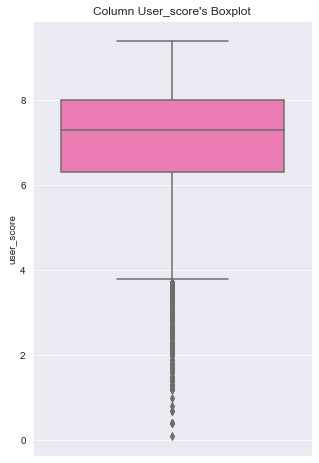

In [189]:
# Verificando a existência de outliers na coluna user_score
games = df.drop_duplicates(subset = ["name"])

plt.figure(figsize = (5,8))
sns.boxplot(y = "user_score", data = games, color = "hotpink")
plt.title("Column User_score's Boxplot")
plt.show()

Vamos então aplicar a média dos valores da coluna desconsiderando os outliers (valores menores do que 4):

In [190]:
#Seleciona as linhas da coluna "user_score" em que os valores são maiores do que 4.
above4 = df[df['user_score']>4]

#Calcula a média dos valores das linhas selecionadas
media_user_score = above4['user_score'].mean()

#Substitui os valores faltantes pela média dos valores maiores do que 4.
df["user_score"].fillna(media_user_score, inplace=True)

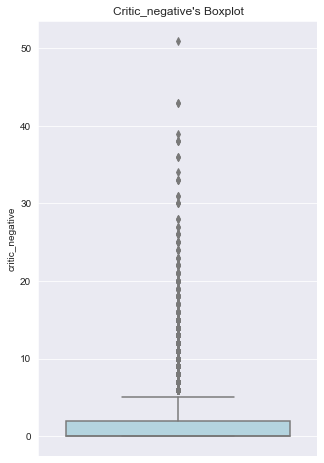

In [191]:
# Verificando a existência de outliers na coluna critic_negative
games = df.drop_duplicates(subset = ["name"])

plt.figure(figsize = (5,8))
sns.boxplot(y = "critic_negative", data = games, color = 'lightblue')
plt.title("Critic_negative's Boxplot")
plt.show()

Vamos então aplicar a média dos valores da coluna desconsiderando os outliers (valores menores do que 5):

In [192]:
#Selecionando as linhas da coluna "critic_negative" em que os valores são menores do que 5.
under5 = df[df['critic_negative']<5]

#Calculando a média dos valores das linhas selecionadas
media_critic_negative = under5['critic_negative'].mean()

#Substituindo os valores faltantes pela média calculada.
df['critic_negative'].fillna(media_critic_negative, inplace=True)

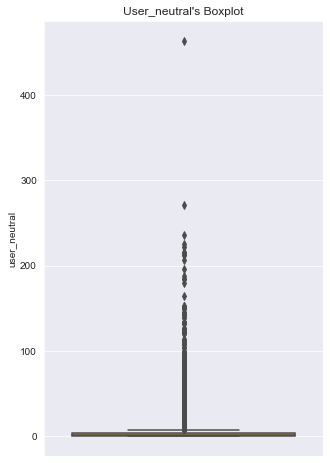

In [193]:
# Verificando a existência de outliers na coluna user_neutral
games = df.drop_duplicates(subset = ["name"])

plt.figure(figsize = (5,8))
sns.boxplot(y = "user_neutral", data = games, color = 'orange')
plt.title("User_neutral's Boxplot")
plt.show()

Optamos por susbtituir os dados faltantes da coluna "user_neutral" pela média dos dados inferiores a 25:

In [194]:
#Selecionando as linhas da coluna "user_neutral" em que os valores são menores do que 25
under25 = df[df['user_neutral']<25]

#Calculando a média dos valores das linhas selecionadas
media_user_neutral = under25['user_neutral'].mean()

#Substituindo os valores faltantes pela média calculada.
df['user_neutral'].fillna(media_user_neutral, inplace=True)

Agora vamos ultilizar a função `info()`para verificar se está tudo certo com a limpeza dos dados:

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20378 entries, 14798 to 15665
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             20378 non-null  object 
 1   platform         20378 non-null  object 
 2   developer        20378 non-null  object 
 3   publisher        20378 non-null  object 
 4   genre            20378 non-null  object 
 5   players          20378 non-null  object 
 6   rating           20378 non-null  object 
 7   release_date     20378 non-null  int64  
 8   critic_positive  20378 non-null  int64  
 9   critic_neutral   20378 non-null  int64  
 10  critic_negative  20378 non-null  int32  
 11  metascore        20378 non-null  int64  
 12  user_positive    20378 non-null  int64  
 13  user_neutral     20378 non-null  float64
 14  user_negative    20378 non-null  int64  
 15  user_score       20378 non-null  float64
dtypes: float64(2), int32(1), int64(6), object(7)
memory us

Tudo certo, limpeza de dados finalizada!

<h3> 6. Analisando os Dados </h3>

Antes de começarmos é preciso fazer algumas definições para melhorar o entendimento dos gráficos, para que as análises fiquem mais claras e fáceis.

In [196]:
#Define a paleta de cores:
sns.set_palette("gist_rainbow")

#Define o estilo para o fundo dos gráficos:
sns.set_style("darkgrid")

## 6.1 Os Jogos Mais Bem Avaliados Pela Crítica

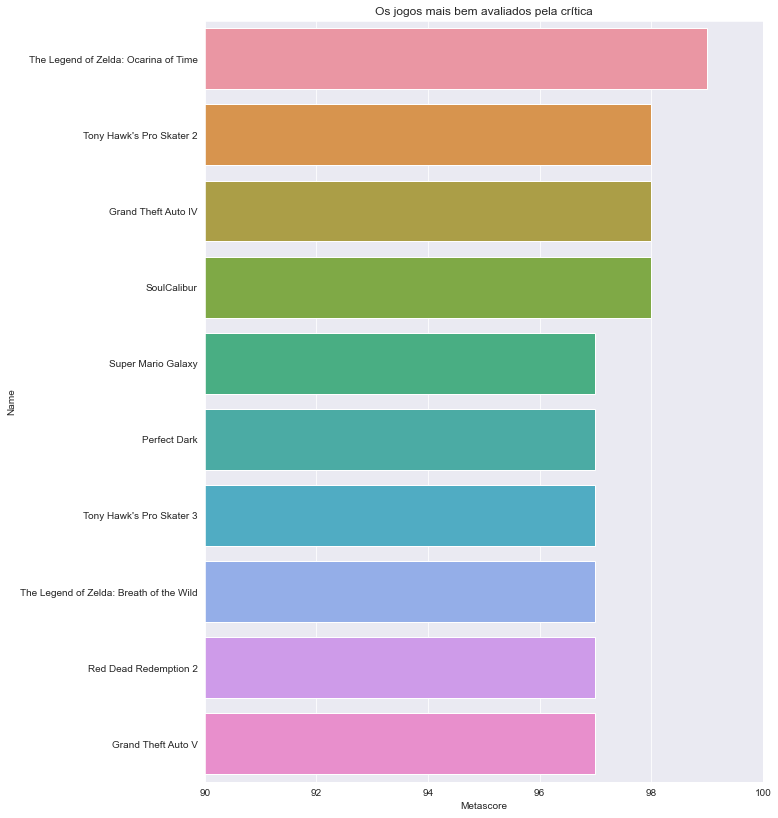

In [197]:
# criando um dataframe apenas com as colunas "name" e "metascore"
name_metascore = df[["name", "metascore"]]
top_critics = name_metascore.loc[(df['metascore'] > 95)].drop_duplicates(subset=['name'])

# plotando o gráfico
plt.figure(figsize = (10,14))
sns.barplot(x = "metascore", y = "name", data = top_critics.sort_values("metascore", ascending = False).head(10))
plt.ylabel("Name")
plt.xlabel("Metascore")
plt.xlim(90, 100)
plt.title("Os jogos mais bem avaliados pela crítica")
plt.show()

Optamos por ver os jogos mais bem avaliados pela crítica, com nota maior ou igual a 97. Escolhemos apresentar esses dados em um gráfico de barras (adequado para esse tipo de ranqueamento) e horizontal (para melhor visualização dos nomes dos jogos).

 ## 6.2 Os Jogos Mais Bem Avaliados Pelos Usuários

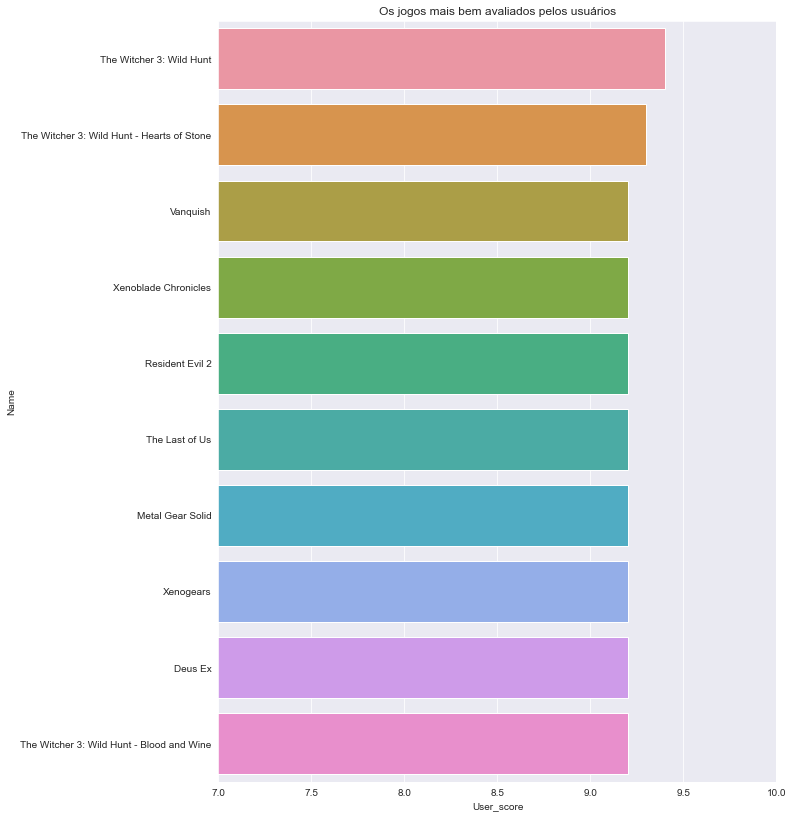

In [198]:
# criando um dataframe apenas com as colunas "name" e "user_score"
name_userscore = df[["name", "user_score"]]
top_users = name_userscore.loc[(df['user_score']> 9)].drop_duplicates(subset=['name'])

# plotando o gráfico
plt.figure(figsize = (10,14))

# Nesse grafico selecionamos os 15 primeiros porque muitos jogos tinham nota maior que 9
sns.barplot(x = "user_score", y = "name", data = top_users.sort_values("user_score", ascending = False).head(10))
plt.ylabel("Name")
plt.xlabel("User_score")
plt.xlim(7, 10)
plt.title("Os jogos mais bem avaliados pelos usuários")
plt.show()

## 6.3 Jogos lançados Por Ano

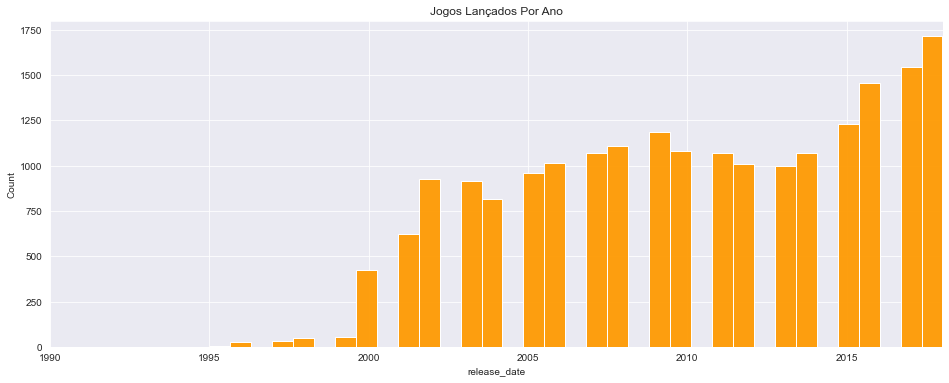

In [199]:
# plotando o gráfico dos jogos lançados por ano
plt.figure(figsize = (16,6))
sns.histplot(df['release_date'])
sns.histplot(df['release_date'], kde=False) #Para não ver a linha do KDE no gráfico use o parâmetro 'kde' igual a 'False', que por padrão é igual a 'True'
plt.title("Jogos Lançados Por Ano")
plt.xlim(1990, 2018)
plt.color='m'

Escolhemos apresentar os dados referentes a quantidade de jogos lançados por ano em um histograma, uma boa escolha para representar variáveis quantitativas.
Podemos observar que a partir de 2000 há um aumento gradativo no número de lançamentos por ano, onde o aumento mais expressivo acontece a partir de 2015 chegando a 1750 lançamentos por ano em 2018.
O que nos leva a questão, quais são os gêneros mais populares? veremos no gráfico abaixo:

## Gêneros Mais Populares

Podemos ver abaixo  quais sãos os gêneros que possuem mais jogos:

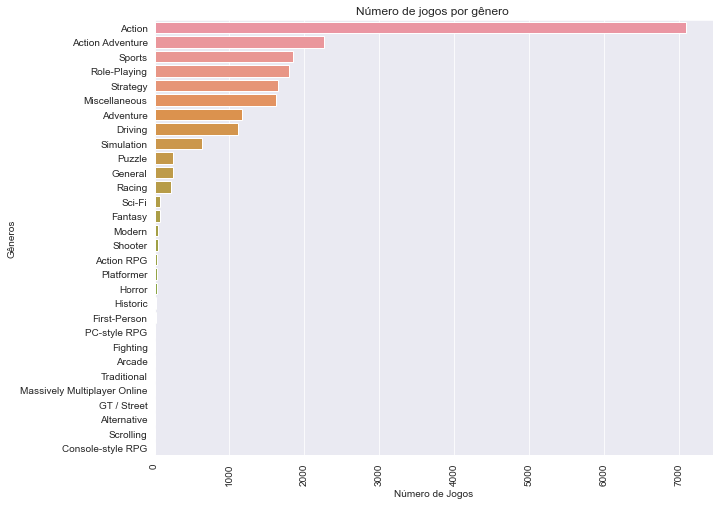

In [220]:
#Plotando o gráfico dos gêneros mais populares
plt.figure(figsize = (10,8))
sns.countplot(y = "genre", data = df, order = df["genre"].value_counts().index)
plt.xticks(rotation = 90)
plt.ylabel("Gêneros")
plt.xlabel("Número de Jogos")
plt.title("Número de jogos por gênero ")
plt.ylim(29.5)
plt.show()

Nós ordenamos a visualização de modo que os gêneros fossem mostrados dos mais populares para os menos populares. Como mostra o gráfico, ação é o gênero mais popular contabilizando um total de 7000 jogos no dataFrame. 

## 6.4 Gêneros Mais Jogados Por Ano

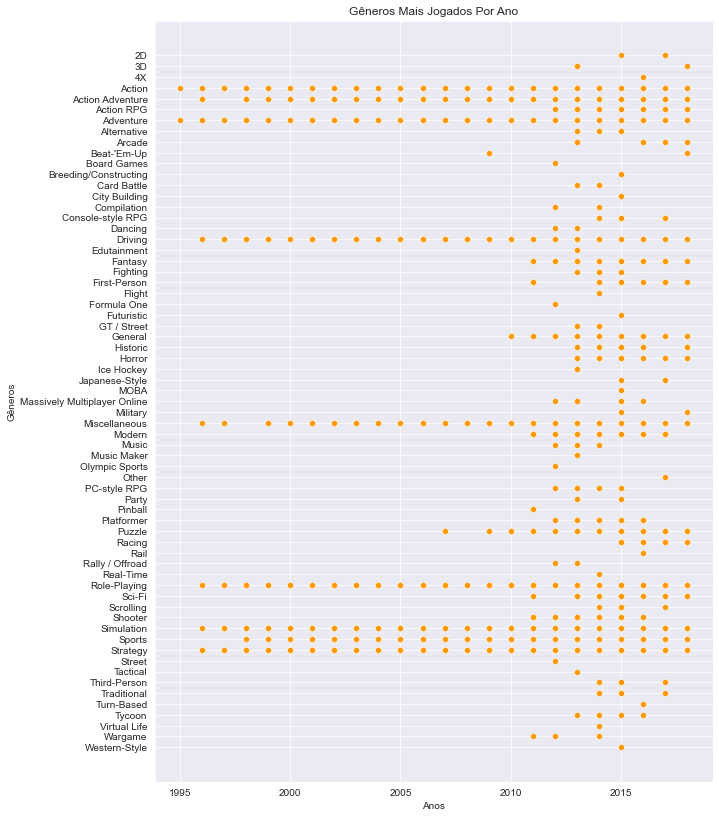

In [202]:
plt.figure(figsize = (10,14))
sns.scatterplot(x = "release_date", y = "genre",  data = df)
plt.xlabel("Anos")
plt.ylabel("Gêneros")
plt.title("Gêneros Mais Jogados Por Ano")
plt.show()


Observamos que: 

- existem gêneros que eram muito jogados em 1995 e que mantiveram certa constância no gosto popular com o passar dos anos, como os jogos de ação, aventura e corrida. 

- Não existe nenhum gênero que tenha sido jogado apenas nos anos 90 mas que depois tenha deixado de ser popular. O que ocorre é uma continuidade. Os gêneros que eram populares em 1995 ainda são bem jogados em 2015.

- A partir de 2010  outros gêneros passaram a ser frequentes como jogos 3D, de fantasia ou de tiro em primeira pessoa (first- person games).


## 6.5 Relação Entre Váriáveis Numéricas 

Uma análise que podemos fazer em um dataset diz respeito à correlação entre seus dados numéricos.Podemos ver se essa relação de implicação existe no chamado "heatmap":

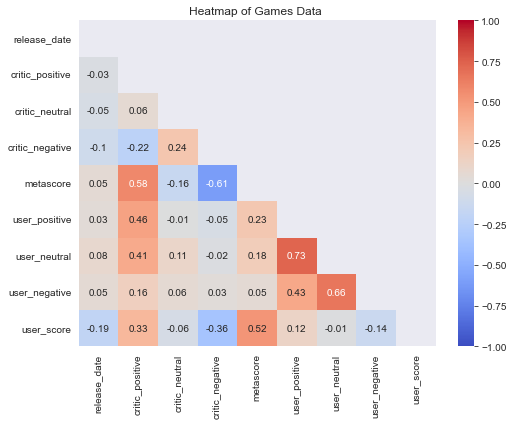

In [203]:
plt.figure(figsize=(8,6))

#O parâmetro mask faz com que o gráfico não fique espelhado, para facilitar a visualização:
corr = df.corr()
mask = mask = np.zeros_like(corr) 
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, vmax=1, vmin=-1, annot=np.round(corr.values, 2), cmap='coolwarm', mask=mask) 
plt.title("Heatmap of Games Data ")
plt.show()

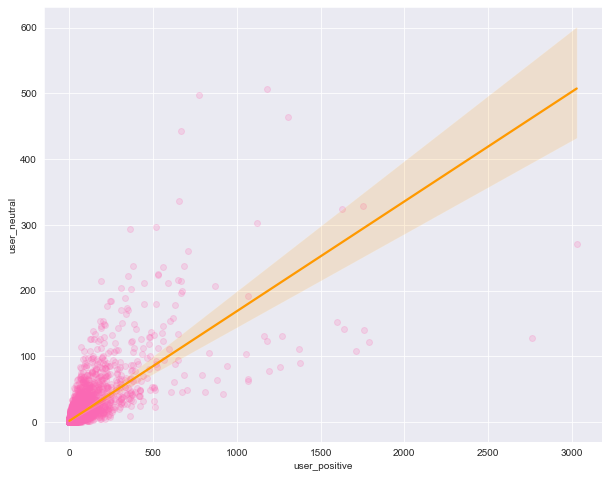

In [204]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'user_positive', y = 'user_neutral', data = df, scatter_kws = {'alpha':0.2,'color':'hotpink'})
plt.show()

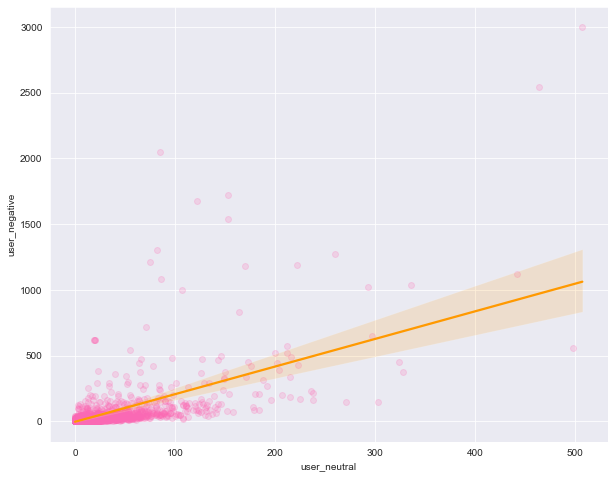

In [205]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'user_neutral', y = 'user_negative', data = df, scatter_kws = {'alpha':0.2,'color':'hotpink'})
plt.show()

## Relação Crítica x Usuários

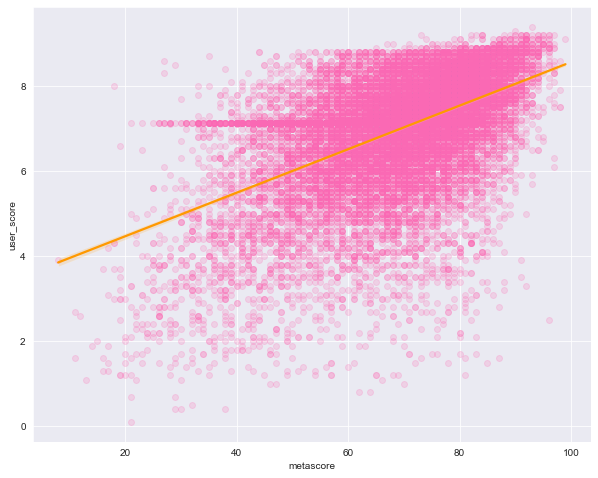

In [206]:
plt.figure(figsize = (10, 8))
sns.regplot(x = 'metascore', y = 'user_score', data = df, scatter_kws = {'alpha':0.2,'color':'hotpink'})
plt.show()

## Conclusões


- Apesar de muitos jogos aparecerem tanto entre os favoritos da crítica quanto dos usuários, no geral, os gráficos que mostram os 15 jogos favoritos pela crítica e pelos usuários diferem bastante nos títulos;

- O jogo favorito da crítica é The Legend of Zelda; Ocarine of Time;

- O jogo favorito dos usuários é The Witcher 3: Wild Hunt

- O gênero mais popular é Ação;

- Há um crescimento no número de lançamentos com o passar dos anos (que pode ser explicada pelo avanço e desenvolvimento de novas tecnologias);

- A partir de 2010  outros gêneros passaram a ser frequentes como jogos 3D, de fantasia ou de tiro em primeira pessoa (first- person games);

-
